In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
list_z=np.linspace(-10,10)

In [3]:
iris = load_iris()
print(iris.data.shape)
A = iris.data
print(iris.target.shape)
print(iris.target)

n = iris.data.shape[0]
d = iris.data.shape[1] 

y = 1.0*np.ones([A.shape[0],1])
for i in range(iris.target.shape[0]):
  if iris.target[i] != 1:
    y[i] = -1   


indexarr = np.arange(n) 
np.random.shuffle(indexarr) 

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
train_data = []
train_label = []
test_data = []
test_label = []
counter = 1
for i in indexarr:
  if counter <= int(0.8*n):
    train_data.append(list(A[i]))
    train_label.append(list(y[i]))
  else:
    test_data.append(list(A[i]))
    test_label.append(list(y[i]))
  counter = counter + 1
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

In [5]:
def predict(w,x):
  y = np.matmul(w.T, x)
  if y > 0:
    return 1
  elif  y < 0:
    return -1

In [6]:
def compute_accuracy(data,labels,model_w):
  n=data.shape[0]
  c=0
  for i in range(n):
    if predict(model_w,data[i])==labels[i]:
      c+=1
  return c*100/n

In [7]:
compute_accuracy(train_data,train_label,np.ones([4,1]))

32.5

Exercise 1

The appropriate choice of $f_i(w)$ can be:




$$f_i(w)=\frac{λ}{2N}\mathbf{w^Tw} +\frac{1}{n}\text{max}\{0,1-y_i\mathbf{w^T}\mathbf{x}_i\}$$


Exercise 2

In [8]:
def compute_loss_h(w,x,y):
  z = 1 - y*np.matmul(w.T,x)
  return max(z, 0)

Exercise 3

In [9]:
def compute_objfnval(data,labels,model_w):
  n=data.shape[0]
  loss=0
  for i in range(n):
    loss+=compute_loss_h(model_w,data[i],labels[i])/n + 1/(2*n) * lamda * np.linalg.norm(model_w)**2
  return loss

Exercise 4

We denote (sub-)gradient by $g_i(w) = \nabla_wf_i(w)$ $;$

-> When $y_iw^\top x_i < 1 $ 

then $ g_i(w) = \frac{\lambda}{n}w - y_ix_i$

-> When $y_iw^\top x_i >= 1 $

 then $g_i(w) = \frac{\lambda}{n}w$



In [10]:
    
def compute_grad_loss_h(x,y,model_w):
  x=np.reshape(x,[4,1])
  model_w=np.reshape(model_w,[4,1])
  if y*np.matmul(model_w.T,x)>1:
    grad=(lamda/n)*model_w
  else:
    grad=((lamda/n)*model_w) - (1/n)*(y*x)
  return grad



Exercise 5

In [11]:
def OPT1(data,label,lamda,num_epochs):
  t = 1
  w=np.ones([4,1])
  f_val=[]
  list_of_train_acc=[]
  list_of_test_acc=[]
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step=1/t
      w=np.subtract(w , step * compute_grad_loss_h(data[i], label[i], w))
      t = t+1
      if t>10000:
        t=1
    f_val.append(compute_objfnval(data,label,w))
    list_of_test_acc.append(compute_accuracy(test_data,test_label,w))
    list_of_train_acc.append(compute_accuracy(data,label,w))

  return w, f_val, list_of_test_acc, list_of_train_acc


Exercise 6

Part a

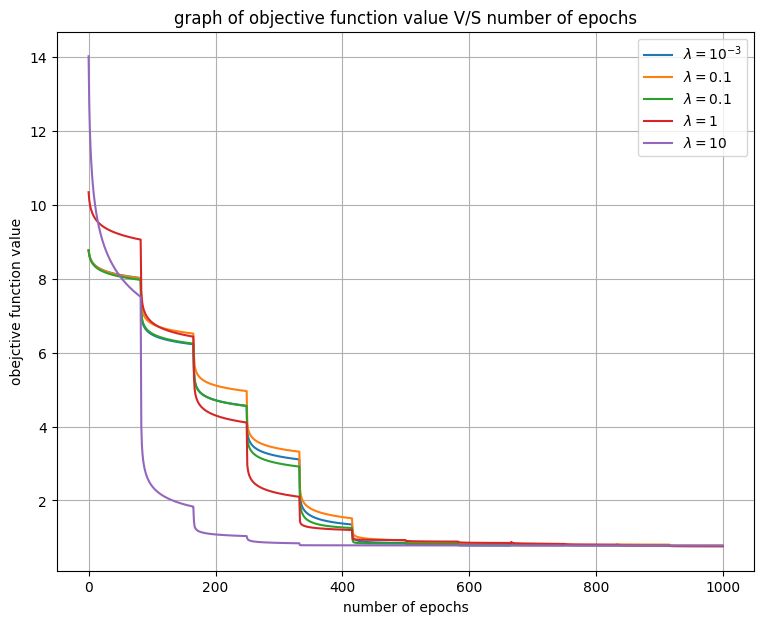

In [12]:
num_epochs=1000
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT1(train_data,train_label,lamda,num_epochs)
  plt.plot(result[1])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.1$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("number of epochs")
  plt.ylabel("obejctive function value")
  plt.title("graph of objective function value V/S number of epochs")
  plt.grid()



Part b

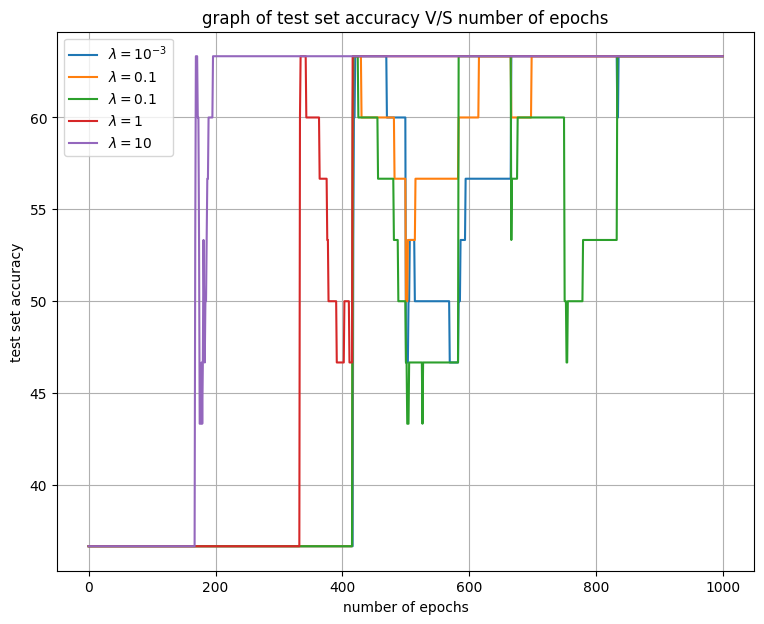

In [13]:
num_epochs=1000
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT1(train_data,train_label,lamda,num_epochs)
  plt.plot(result[2])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.1$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("number of epochs")
  plt.ylabel("test set accuracy")
  plt.title("graph of test set accuracy V/S number of epochs")
  plt.grid()


Part C

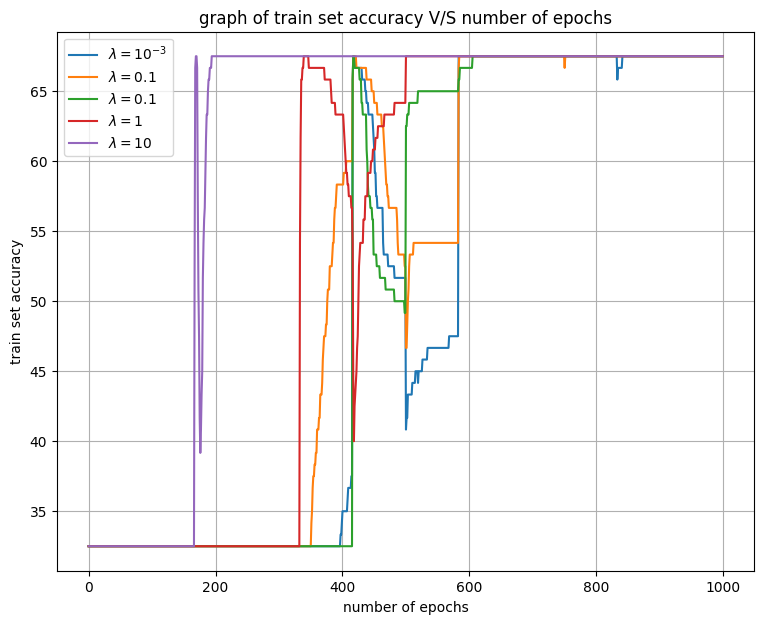

In [14]:
num_epochs=1000
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT1(train_data,train_label,lamda,num_epochs)
  plt.plot(result[3])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.1$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("number of epochs")
  plt.ylabel("train set accuracy")
  plt.title("graph of train set accuracy V/S number of epochs")
  plt.grid()


Part D

In [15]:
from tabulate import tabulate
head = ["value of lamda", "Training accuracy","Test accuracy"]
my_data=[[list_of_lamda[i],OPT1(train_data,train_label,list_of_lamda[i],num_epochs)[3][-1],OPT1(train_data,train_label,list_of_lamda[i],num_epochs)[2][-1]] for i in range(len(list_of_lamda))]
print(tabulate(my_data, headers=head, tablefmt="grid"))

+------------------+---------------------+-----------------+
|   value of lamda |   Training accuracy |   Test accuracy |
+==================+=====================+=================+
|            0.001 |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|            0.01  |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|            0.1   |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|            1     |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|           10     |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+


Part e
Both training and test remains same for different values of lambda

Exercise 7

In [16]:
def compute_loss_h(w,x,y):
  return max(0, np.subtract(1, np.dot(y, np.dot(w, np.transpose(x)))))


In [17]:
def compute_objfnval_h(data,labels,w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_h(w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

In [18]:
def compute_grad_loss_h(x,y,w,i):
  l = 0
  if np.multiply(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    l = np.multiply(lamda, w)/data.shape[0]
  else:
    l = np.subtract(np.multiply(lamda, w), np.multiply(y[i], np.transpose(x[i])))/data.shape[0]
  return l

In [19]:
def OPT2_h(data, label, lamda):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval = []
  list_of_test_acc = []
  list_of_train_acc = []
  x = data
  epoch = 0
  precision = False
  while (epoch < 100 or precision == False):
    if epoch > 100:
      a2 = list_of_train_acc[-1] - list_of_train_acc[-10]
      if max(a2, -a2) < 0.00001:
        precision = True
    np.random.shuffle(arr) 
    for i in np.nditer(arr):
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_h(x,y,w,i))) 
      t = t+1
    if epoch % 10 == 0:
      list_of_train_acc.append(compute_accuracy(train_data, train_label, w))
      list_of_test_acc.append(compute_accuracy(test_data, test_label, w))
      fval.append(compute_objfnval_h(data,label,w))
    epoch = epoch + 1
  return w, fval, list_of_test_acc, list_of_train_acc

In [20]:
lambda_set = [10**-3,0.01,0.1,  1, 10]
data = train_data
label = train_label
print("Using Hinge loss function with modified criterion:")
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT2_h(train_data,train_label,lamda)
  print("\nlambda =", lamda)
  print("Test set accuracy = ", test_set_accuracy_array[-1])
  print("Train set accuracy = ", train_set_accuracy_array[-1])

Using Hinge loss function with modified criterion:

lambda = 0.001
Test set accuracy =  36.666666666666664
Train set accuracy =  32.5

lambda = 0.01
Test set accuracy =  63.333333333333336
Train set accuracy =  67.5

lambda = 0.1
Test set accuracy =  63.333333333333336
Train set accuracy =  67.5

lambda = 1
Test set accuracy =  63.333333333333336
Train set accuracy =  67.5

lambda = 10
Test set accuracy =  63.333333333333336
Train set accuracy =  67.5


Exercise 8

In [21]:
def compute_loss_l(w,x,y):
  return np.log(np.add(1, np.exp(-np.dot(y, np.dot(w, np.transpose(x))))))

In [22]:
def compute_objfnval_l(data,labels,w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_l(w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

In [23]:
def compute_grad_loss_l(data, label,w ,i):
  return np.subtract(np.multiply(lamda, w), np.multiply(np.multiply(label[i], np.transpose(data[i])), np.exp(-np.dot(label[i], np.dot(w, np.transpose(data[i])))))/np.add(1, np.exp(-np.dot(label[i], np.dot(w, np.transpose(data[i]))))))/data.shape[0]

In [24]:
def OPT1_l(data, label, lamda, epochs):
  t = 1
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval = []
  list_of_test_acc = []
  list_of_train_acc = []
  x = data
  precision = False
  for epoch in range(epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr): 
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_l(x,y,w,i))) 
      t = t+1
    if t>10000:
      t=1
    list_of_train_acc.append(compute_accuracy(train_data, train_label, w))
    list_of_test_acc.append(compute_accuracy(test_data, test_label, w))
    fval.append(compute_objfnval_l(data,label,w))
  return w, fval, list_of_test_acc, list_of_train_acc

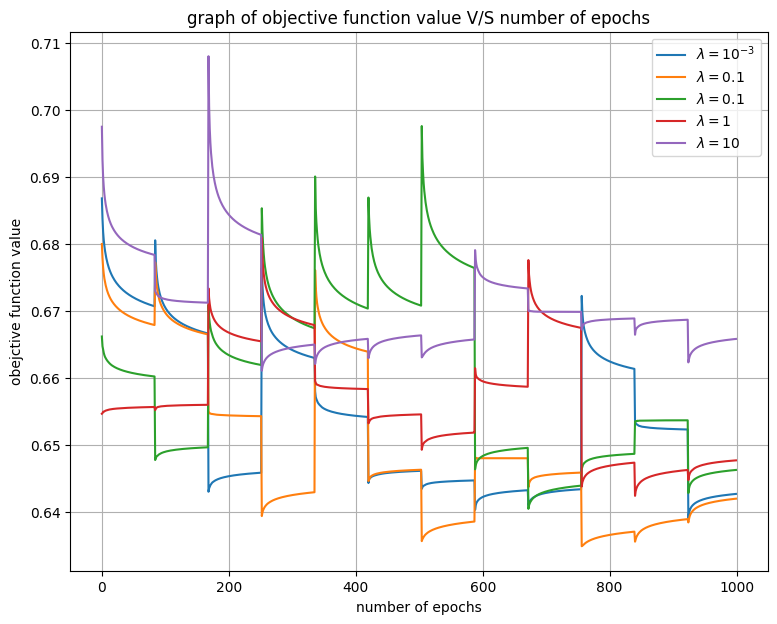

In [25]:
num_epochs=1000
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT1_l(train_data,train_label,lamda,num_epochs)
  plt.plot(result[1])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.1$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("number of epochs")
  plt.ylabel("obejctive function value")
  plt.title("graph of objective function value V/S number of epochs")
  plt.grid()


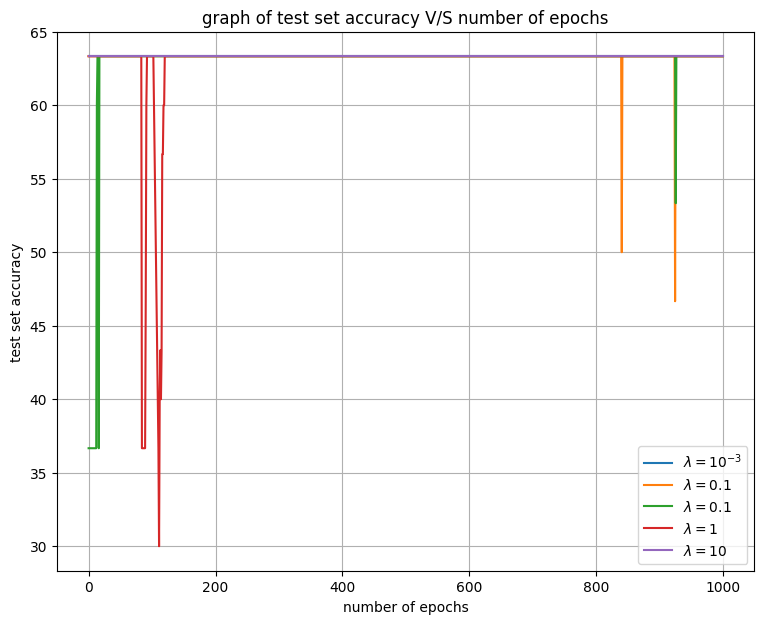

In [26]:
num_epochs=1000
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT1_l(train_data,train_label,lamda,num_epochs)
  plt.plot(result[2])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.1$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("number of epochs")
  plt.ylabel("test set accuracy")
  plt.title("graph of test set accuracy V/S number of epochs")
  plt.grid()


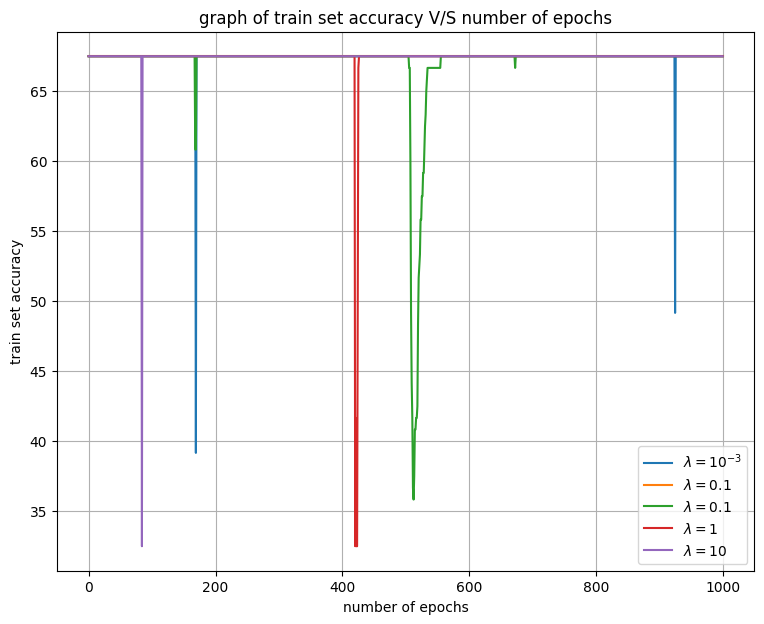

In [27]:
num_epochs=1000
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT1_l(train_data,train_label,lamda,num_epochs)
  plt.plot(result[3])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.1$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("number of epochs")
  plt.ylabel("train set accuracy")
  plt.title("graph of train set accuracy V/S number of epochs")
  plt.grid()


In [28]:
from tabulate import tabulate
head = ["value of lamda", "Training accuracy","Test accuracy"]
my_data=[[list_of_lamda[i],OPT1_l(train_data,train_label,list_of_lamda[i],num_epochs)[3][-1],OPT1_l(train_data,train_label,list_of_lamda[i],num_epochs)[2][-1]] for i in range(len(list_of_lamda))]
print(tabulate(my_data, headers=head, tablefmt="grid"))

+------------------+---------------------+-----------------+
|   value of lamda |   Training accuracy |   Test accuracy |
+==================+=====================+=================+
|            0.001 |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|            0.01  |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|            0.1   |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|            1     |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|           10     |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+


Modified stopping criteria

In [29]:
def OPT2_l(data, label, lamda):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval= []
  list_of_test_acc = []
  list_of_train_acc = []
  x = data
  epoch = 0
  precision = False
  while (epoch < 100 or precision == False):
    if epoch > 100:
      a2 = list_of_train_acc[-1] - list_of_train_acc[-10]
      if max(a2, -a2) < 0.00001:
        precision = True
    np.random.shuffle(arr) 
    for i in np.nditer(arr): 
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_l(x,y,w,i))) 
      t = t+1
    list_of_train_acc.append(compute_accuracy(train_data, train_label, w))
    list_of_test_acc.append(compute_accuracy(test_data, test_label, w))
    fval.append(compute_objfnval_l(data,label,w))
    epoch = epoch + 1
  return w, fval, list_of_test_acc, list_of_train_acc

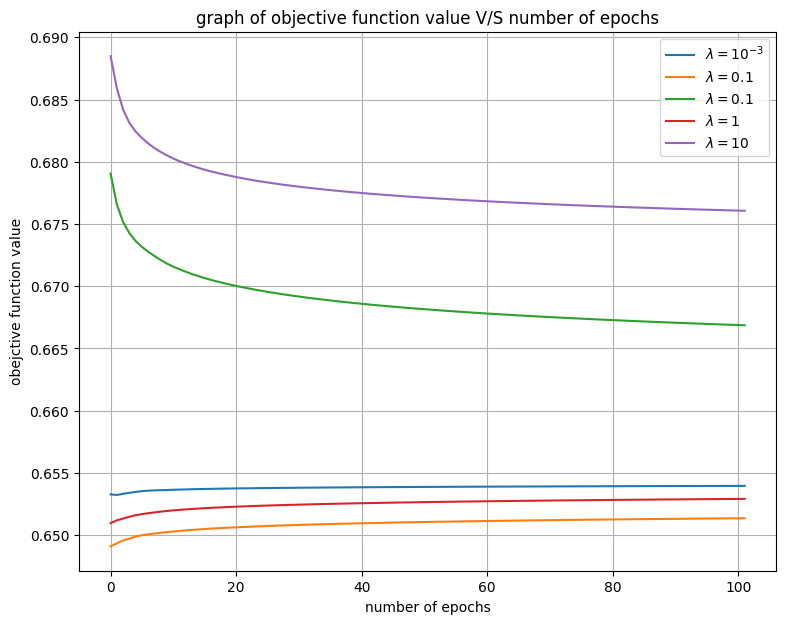

In [30]:
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT2_l(train_data,train_label,lamda)
  plt.plot(result[1])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.1$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("number of epochs")
  plt.ylabel("obejctive function value")
  plt.title("graph of objective function value V/S number of epochs")
  plt.grid()

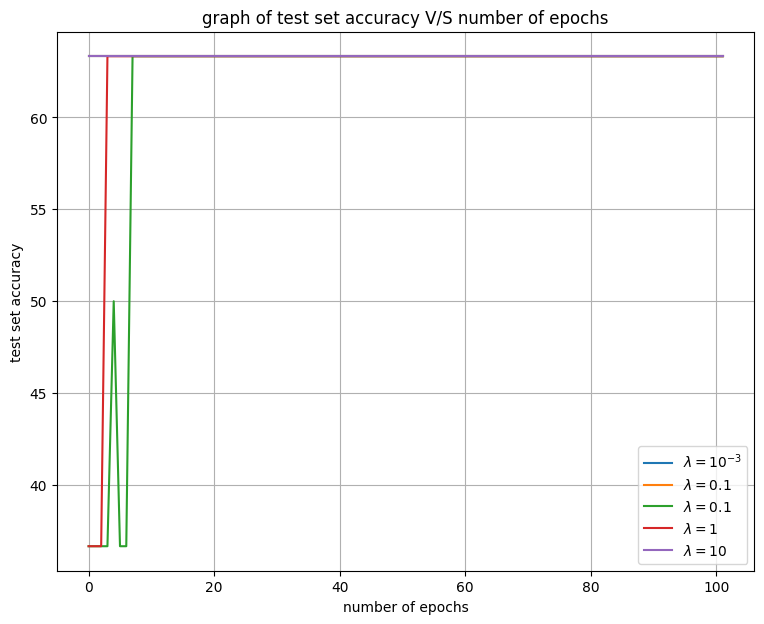

In [31]:
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT2_l(train_data,train_label,lamda)
  plt.plot(result[2])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.1$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("number of epochs")
  plt.ylabel("test set accuracy")
  plt.title("graph of test set accuracy V/S number of epochs")
  plt.grid()

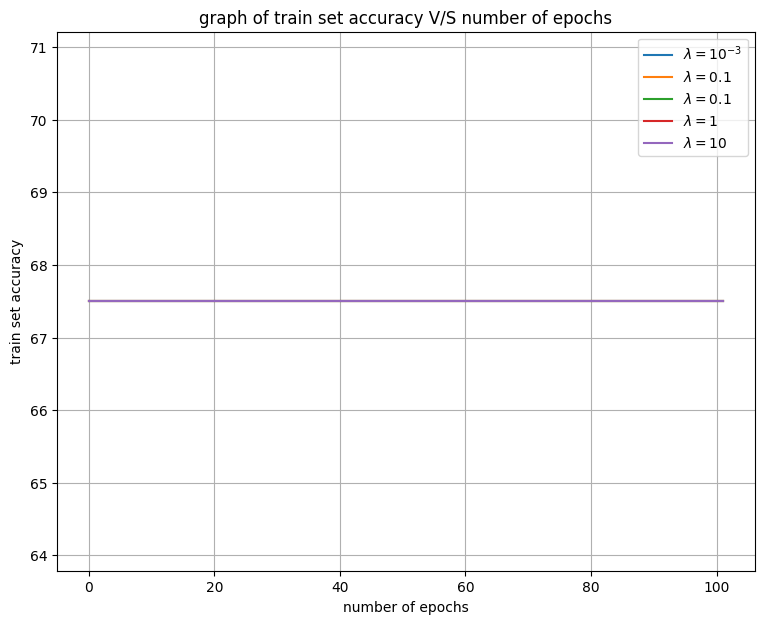

In [32]:
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT2_l(train_data,train_label,lamda)
  plt.plot(result[3])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.1$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("number of epochs")
  plt.ylabel("train set accuracy")
  plt.title("graph of train set accuracy V/S number of epochs")
  plt.grid()


In [33]:
from tabulate import tabulate
head = ["value of lamda", "Training accuracy","Test accuracy"]
my_data=[[list_of_lamda[i],OPT2_l(train_data,train_label,list_of_lamda[i])[3][-1],OPT2_l(train_data,train_label,list_of_lamda[i])[2][-1]] for i in range(len(list_of_lamda))]
print(tabulate(my_data, headers=head, tablefmt="grid"))

+------------------+---------------------+-----------------+
|   value of lamda |   Training accuracy |   Test accuracy |
+==================+=====================+=================+
|            0.001 |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|            0.01  |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|            0.1   |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|            1     |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|           10     |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+


Squared hinge loss 

In [34]:
def compute_loss_sh(w,x,y):
  return max(0, np.subtract(1, np.dot(y, np.dot(w, np.transpose(x)))))**2

In [35]:
def compute_objfnval_sh(data,labels,w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_sh(w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

In [36]:
def compute_grad_loss_sh(x,y,w,i):
  l = 0
  if np.dot(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    l = np.multiply(lamda, w)/data.shape[0]
  else:
    l = np.subtract(np.multiply(lamda, w), np.multiply(np.multiply(2, np.subtract(1, np.dot(y[i], np.dot(w, np.transpose(x[i]))))), np.multiply(y[i], np.transpose(x[i]))))/data.shape[0]
  return l

In [37]:
def OPT1_sh(data, label, lamda, num_epochs):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval = []
  list_of_test_acc = []
  list_of_train_acc = []
  x = data
  for epoch in range(num_epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr):
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_sh(x,y,w,i))) 
      t = t+1
    if t>10000:
      t=1
    list_of_train_acc.append(compute_accuracy(train_data, train_label, w))
    list_of_test_acc.append(compute_accuracy(test_data, test_label, w))
    fval.append(compute_objfnval_sh(data,label,w))
  return w, fval, list_of_test_acc, list_of_train_acc

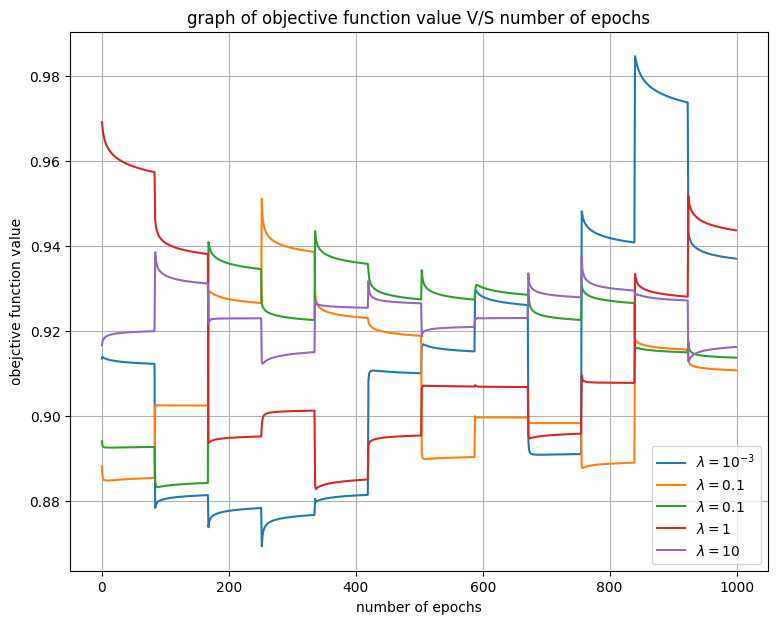

In [38]:
num_epochs=1000
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT1_sh(train_data,train_label,lamda,num_epochs)
  plt.plot(result[1])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.1$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("number of epochs")
  plt.ylabel("obejctive function value")
  plt.title("graph of objective function value V/S number of epochs")
  plt.grid()


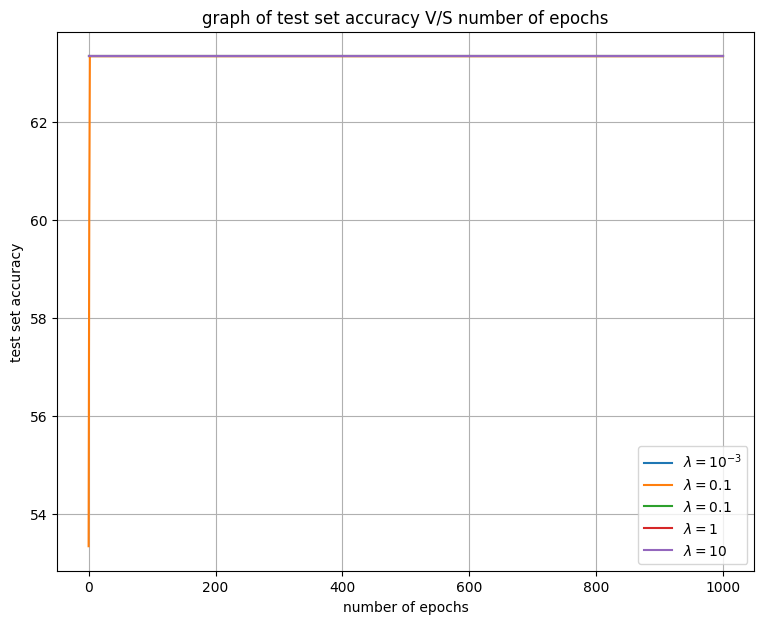

In [39]:
num_epochs=1000
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT1_sh(train_data,train_label,lamda,num_epochs)
  plt.plot(result[2])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.1$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("number of epochs")
  plt.ylabel("test set accuracy")
  plt.title("graph of test set accuracy V/S number of epochs")
  plt.grid()


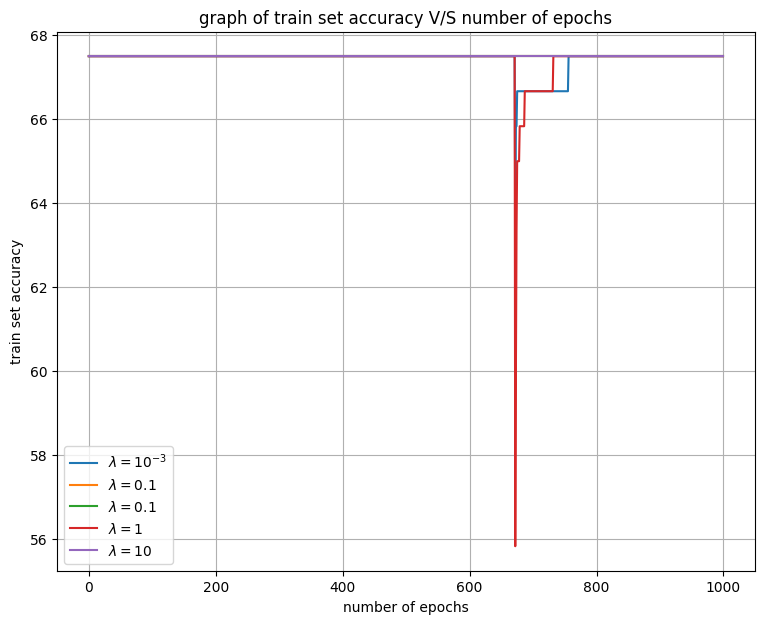

In [40]:
num_epochs=1000
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT1_sh(train_data,train_label,lamda,num_epochs)
  plt.plot(result[3])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.1$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("number of epochs")
  plt.ylabel("train set accuracy")
  plt.title("graph of train set accuracy V/S number of epochs")
  plt.grid()

In [41]:
from tabulate import tabulate
head = ["value of lamda", "Training accuracy","Test accuracy"]
my_data=[[list_of_lamda[i],OPT1_sh(train_data,train_label,list_of_lamda[i],num_epochs)[3][-1],OPT1_sh(train_data,train_label,list_of_lamda[i],num_epochs)[2][-1]] for i in range(len(list_of_lamda))]
print(tabulate(my_data, headers=head, tablefmt="grid"))

+------------------+---------------------+-----------------+
|   value of lamda |   Training accuracy |   Test accuracy |
+==================+=====================+=================+
|            0.001 |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|            0.01  |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|            0.1   |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|            1     |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|           10     |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+


Modified function of Squared hinge loss

In [42]:
def OPT2_sh(data, label, lamda):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval= []
  list_of_test_acc = []
  list_of_train_acc = []
  x = data
  epoch = 0
  precision = False
  while (epoch < 100 or precision == False):
    if epoch > 100:
      a2 = list_of_train_acc[-1] - list_of_train_acc[-10]
      if max(a2, -a2) < 0.00001:
        precision = True
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_sh(x,y,w,i)))
      t=t+1
      if t>10000:
        t=1
    list_of_train_acc.append(compute_accuracy(train_data, train_label, w))
    list_of_test_acc.append(compute_accuracy(test_data, test_label, w))
    fval.append(compute_objfnval_sh(data,label,w))
    epoch = epoch + 1
  return w, fval, list_of_test_acc, list_of_train_acc

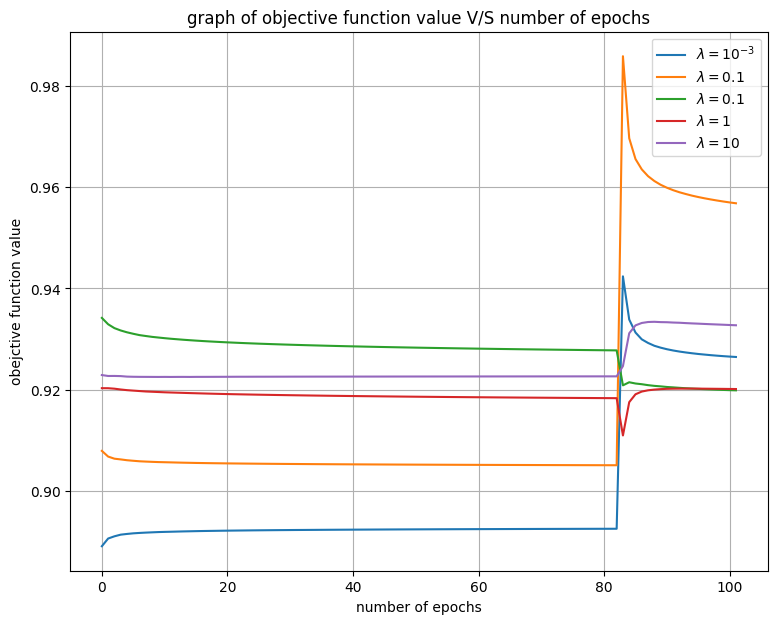

In [43]:
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT2_sh(train_data,train_label,lamda)
  plt.plot(result[1])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.1$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("number of epochs")
  plt.ylabel("obejctive function value")
  plt.title("graph of objective function value V/S number of epochs")
  plt.grid()

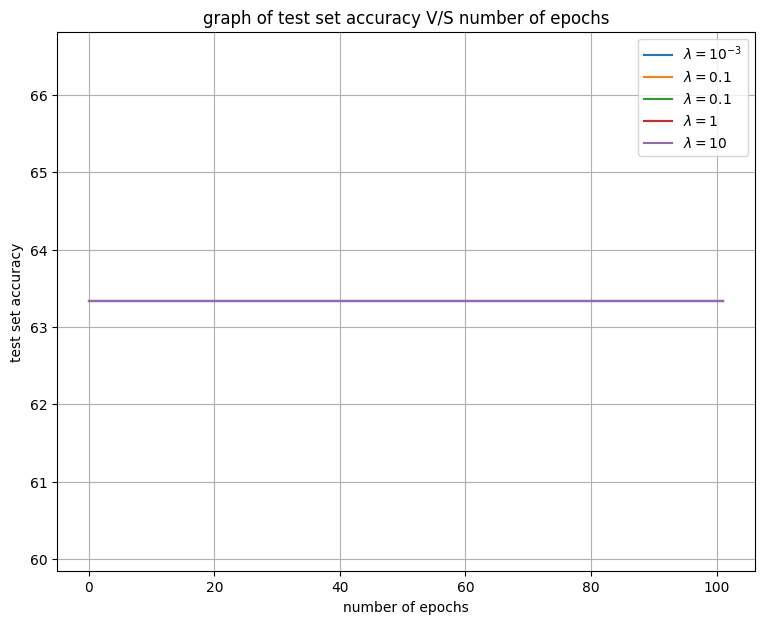

In [44]:
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT2_sh(train_data,train_label,lamda)
  plt.plot(result[2])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.1$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("number of epochs")
  plt.ylabel("test set accuracy")
  plt.title("graph of test set accuracy V/S number of epochs")
  plt.grid()

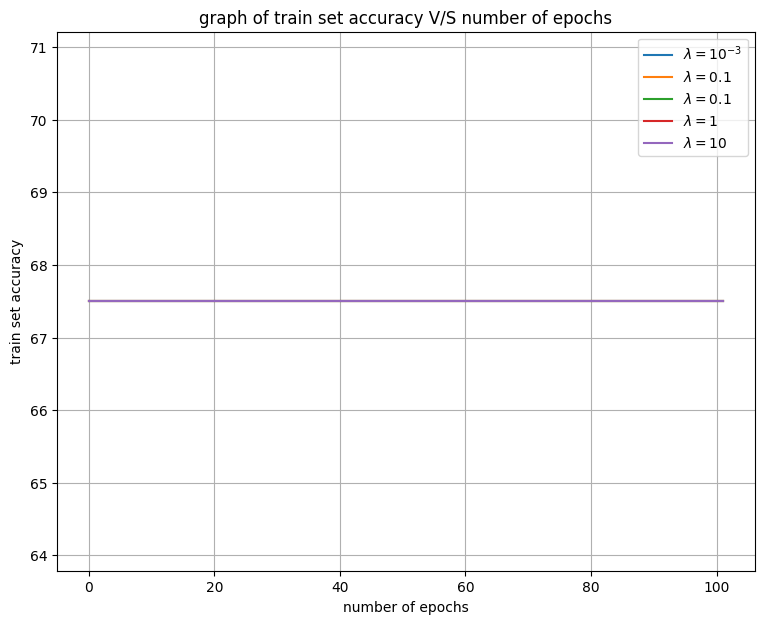

In [45]:
list_of_lamda=[0.001,0.01,0.1,1,10]
plt.figure(figsize=(9,7))
for lamda in list_of_lamda:
  result=OPT2_sh(train_data,train_label,lamda)
  plt.plot(result[3])
  plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.1$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
  plt.xlabel("number of epochs")
  plt.ylabel("train set accuracy")
  plt.title("graph of train set accuracy V/S number of epochs")
  plt.grid()

In [46]:
from tabulate import tabulate
head = ["value of lamda", "Training accuracy","Test accuracy"]
my_data=[[list_of_lamda[i],OPT2_sh(train_data,train_label,list_of_lamda[i])[3][-1],OPT2_sh(train_data,train_label,list_of_lamda[i])[2][-1]] for i in range(len(list_of_lamda))]
print(tabulate(my_data, headers=head, tablefmt="grid"))

+------------------+---------------------+-----------------+
|   value of lamda |   Training accuracy |   Test accuracy |
+==================+=====================+=================+
|            0.001 |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|            0.01  |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|            0.1   |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|            1     |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+
|           10     |                67.5 |         63.3333 |
+------------------+---------------------+-----------------+


From all graphs, we see that both test accuracy and train accuracy either increasing or staying same.for each value of lamda the training and testing accuracy are 67.5% and 63.33% respectively.